<a href="https://colab.research.google.com/github/AndikaYudantara/Risreg/blob/master/image_recognition_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classification with scikit-learn: Goole Street View House Numbers

By [Ellie Birbeck](https://elliebirbeck.com) for [Hyperion Dev](https://blog.hyperiondev.com/)


### Dataset

For this tutorial we’ll be using a dataset from [Stanford University](http://ufldl.stanford.edu/housenumbers). It contains images of house numbers taken from Google Street View. Each one has been cropped to 32x32 pixels in size, focussing on just the number. Some examples are shown below. 

![house-numbers](http://ufldl.stanford.edu/housenumbers/32x32eg.png)

There are a total of 531131 images in our dataset, and we will load them in as one 4D-matrix of shape `32 x 32 x 3 x 531131`. 
This represents each 32x32 image in RGB format (so the 3 red, green, blue colour channels) for each of our 531131 images. 
We’ll be predicting the number shown in the image, from one of ten classes (0-9). Note that in this dataset the number 0 is represented by the label 10. 

The labels are stored in a 1D-matrix of shape `531131 x 1`. You can check the dimensions of a matrix `X` at any time in your program using `X.shape`.  

### Feature Processing

Now let’s begin! To understand the data we’re using, we can start by loading and viewing the image files. First we need to import three libraries.

In [0]:
import cv2
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

Then we can load the training dataset into a temporary variable `train_data`, which is a dictionary object. The dictionary contains two variables `X` and `y`. `X` is our 4D-matrix of images, and `y` a 1D-matrix of the corresponding labels. So to access the i-th image in our dataset we would be looking for `X[:,:,:,i]`, and its label would be `y[i]`. Let’s do this for image 10.

In [0]:
# load our dataset


# train_data = scipy.io.loadmat('datasets/extra_32x32.mat')
train_data = scipy.io.loadmat('drive/My Drive/datasets/train_32x32.mat')
test_data = scipy.io.loadmat('drive/My Drive/datasets/test_32x32.mat')

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# extract the images and labels from the dictionary object
X = train_data['X']
y = train_data['y']

[1]


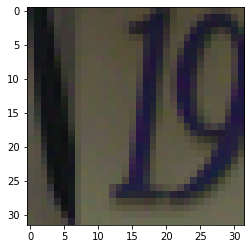

In [139]:
# view an image (e.g. 10) and print its corresponding label
img_index = 0
plt.imshow(X[:,:,:,img_index])
print(y[img_index])

> The first code block will take a short while to load if you are using the largest dataset. If you are getting errors here, check two things. Firstly, ensure that your downloaded dataset is saved in the same directory as this notebook. And secondly, ensure the filename matches the code (if you downloaded the smaller dataset, you will have a different filename of `'train_32x32.mat'`).

As you can see, we load up an image showing house number 2, and the console output from our printed label is also 2. You can change the index of the image (to any number between 0 and 531130) and check out different images and their labels if you like. 

Now, to use these images with a machine learning algorithm, we first need to vectorise them. 

This essentially involves stacking up the 3 dimensions of each image (the width x height x colour channels) to transform it into a 1D-matrix. 

This gives us our feature vector, although it’s worth noting that this is not really a feature vector in the usual sense. 

Features usually refer to some kind of quantification of a specific trait of the image, not just the raw pixels. 

Raw pixels can be used successfully in machine learning algorithms, but this is typically with more complex models such as convolutional neural networks, which can learn specific features themselves within their network of layers. 

In [0]:
from sklearn.utils import shuffle

X = X.reshape(X.shape[0]*X.shape[1]*X.shape[2],X.shape[3]).T
y = y.reshape(y.shape[0],)
X, y = shuffle(X, y)

We’re also shuffling our data just to be sure there are no underlying distributions. The library we’ve used for this ensures that the index pairings between our images in `X` and their labels in `y` are maintained through the shuffling process. 

### Machine Learning Algorithms

Now that we have our feature vector `X` ready to go, we need to decide which machine learning algorithm to use. We don’t need to explicitly program an algorithm ourselves - luckily frameworks like scikit-learn do this for us. 

If you don’t have any prior experience in machine learning, you can use this helpful [cheat sheet](http://scikit-learn.org/stable/tutorial/machine_learning_map/) to guide you in which algorithms to try out depending on your data. 

For now we will be using a Random Forest approach with default hyperparameters. You can learn more about Random Forests [here](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html ), but in brief they are a construction of multiple decision trees with an output that averages the results of individual trees to prevent fitting too closely to any one tree. 

First we import the necessary library and then define our classifier.

In [141]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

print(clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


We can also print the classifier to the console to see the parameter settings used. 


### Training the model

We’re now ready to train and test our data. But before we do that, we need to split our total collection of images into two sets - one for training and one for testing. You can also add a third set for development/validation, which you can read more about [here](https://en.wikipedia.org/wiki/Training,_test,_and_validation_sets).

Keeping the testing set completely separate from the training set is important, because we need to be sure that the model will perform well in the real world. Once trained, it will have seen many example images of house numbers. We want to be sure that when presented with new images of numbers it hasn’t seen before, that it has actually learnt something from the training and can generalise that knowledge - not just remember the exact images it has already seen.

Usually we use between 70-90% of the data for training, though this varies depending on the amount of data collected, and the type of model trained. For example, neural networks are often used with extremely large amounts of data and may sample 99% of the data for training. In this tutorial we’ll go with 80%.  

Again, using the largest dataset means that fitting the model may take a little while.

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Test Results

Now we’re ready to use our trained model to make predictions on new data.

9


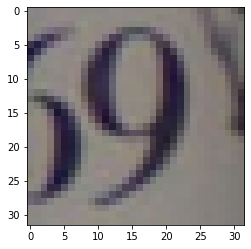

In [172]:

X = test_data['X']
img_index = 50
plt.imshow(X[:,:,:,img_index])

X = X.reshape(X.shape[0]*X.shape[1]*X.shape[2],X.shape[3]).T
hasil = clf.predict(X)
print(hasil[img_index])

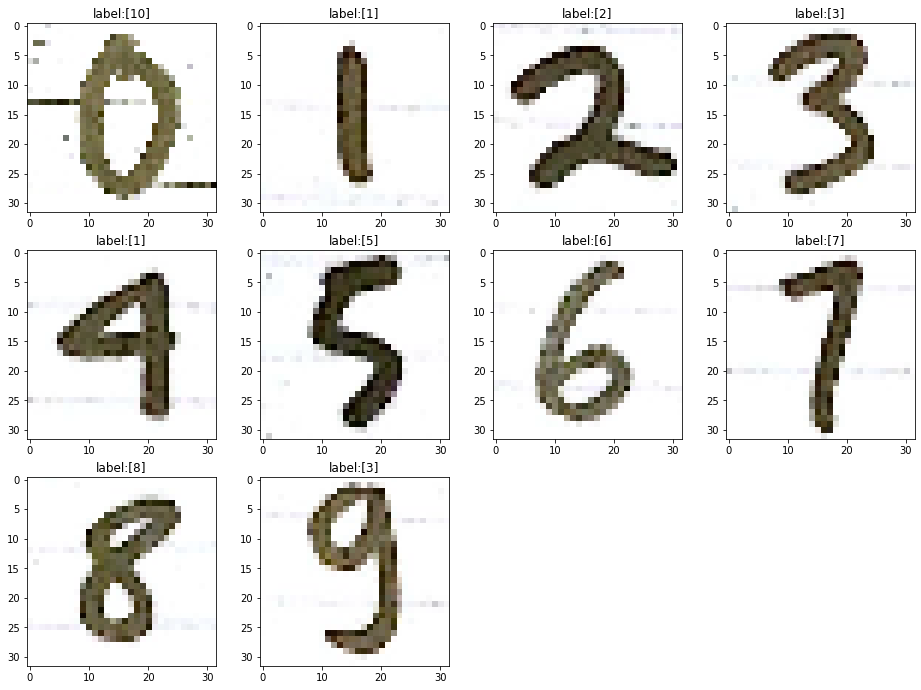

In [226]:
fig = plt.figure(figsize=(16, 16))
columns = 4
rows = 4
# ax enables access to manipulate each of subplots
ax = []

for i in range(10):
    img = cv2.imread('drive/My Drive/datasets/raw_data/data'+str(i)+'.jpg')
    res = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
    features = np.reshape(res, (32*32*3))
    features = features.reshape(1, -1)
    label = clf.predict(features)

    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("label:"+str(label))  # set title
    plt.imshow(res)

plt.show() 